In [1]:
"""
import sys
import os

parent=os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.append(parent)
"""

import main

/home/lachlan/.pyenv/versions/3.7.13/envs/venv_readoutxfm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------
PATHS
---------------------------
local: /home/lachlan/CODEBASE/ReadoutXFM
data: /home/lachlan/CODEBASE/ReadoutXFM/data/example_datafile.GeoPIXE
output: /home/lachlan/CODEBASE/ReadoutXFM/data/out_example_datafile
---------------------------
---------------------------
header length: 1162 (bytes)
--------------
INDEXING
Row 70/70 at pixel 12249, byte 88726796 (100.0 %)
END OF MAP: row 70/70, pixel 12249
--------------
PARSING PIXEL DATA
Row 70/70 at pixel 12249, byte 88722712 (100.0 %)
END OF MAP: row 70/70, pixel 12249
---------------------------
COMPLETE
---------------------------
dimensions expected (x,y): 175,70
pixels expected (X*Y): 12250
pixels found: 12250
total time: 16.12 s
time per pixel: 0.001316 s
---------------------------
rgb maxima: r 2.4009400289856697 g 1.1785717493124563 b 4.766513998780529
scaled maxima: r 0.5037098453083174 g 0.24726073386420003 b 1.0
REDUCER 1 of 2: PCA across 12250 elements
REDUCER 2 of 2: UMAP across 12250 elements
K

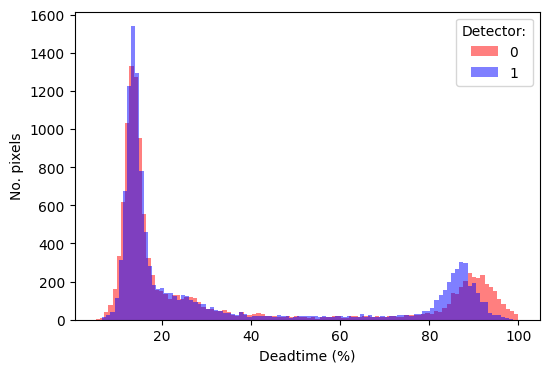

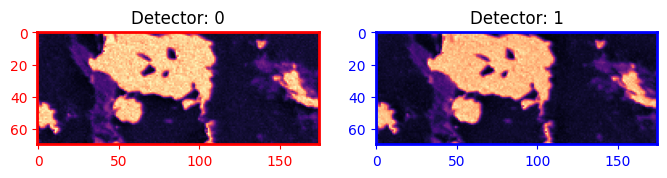

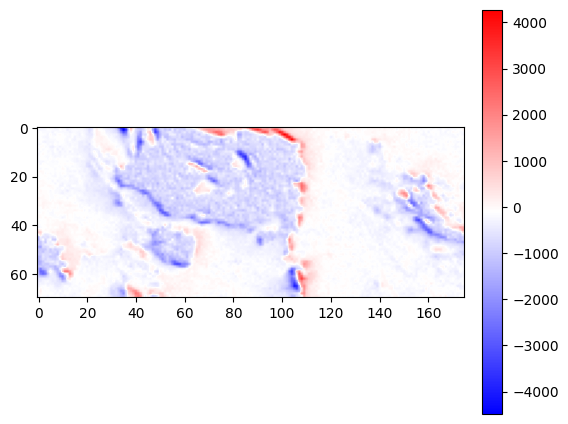

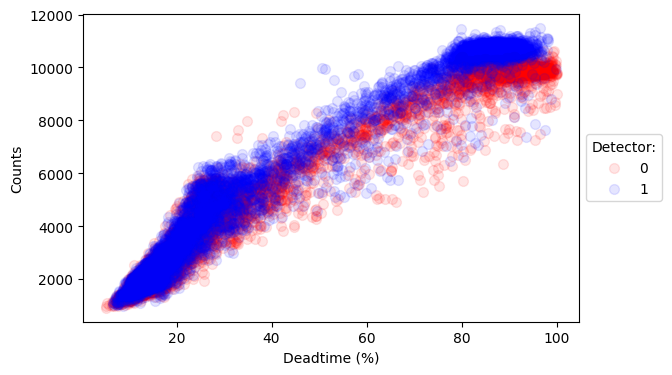

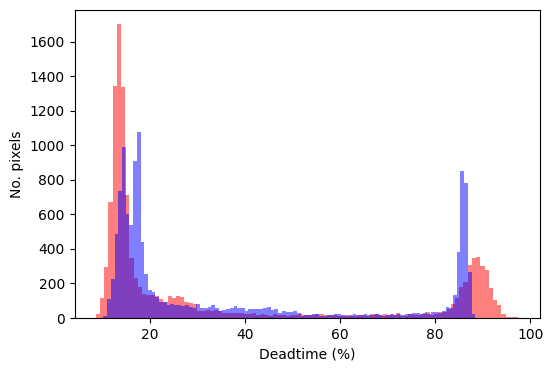

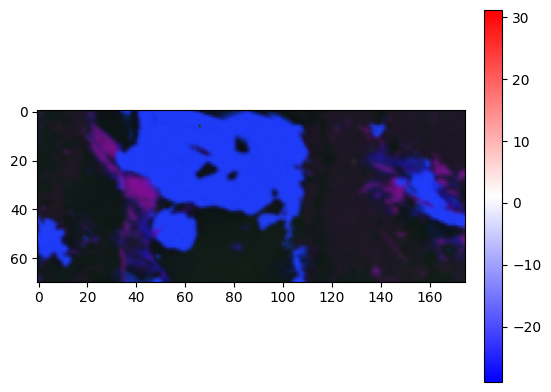

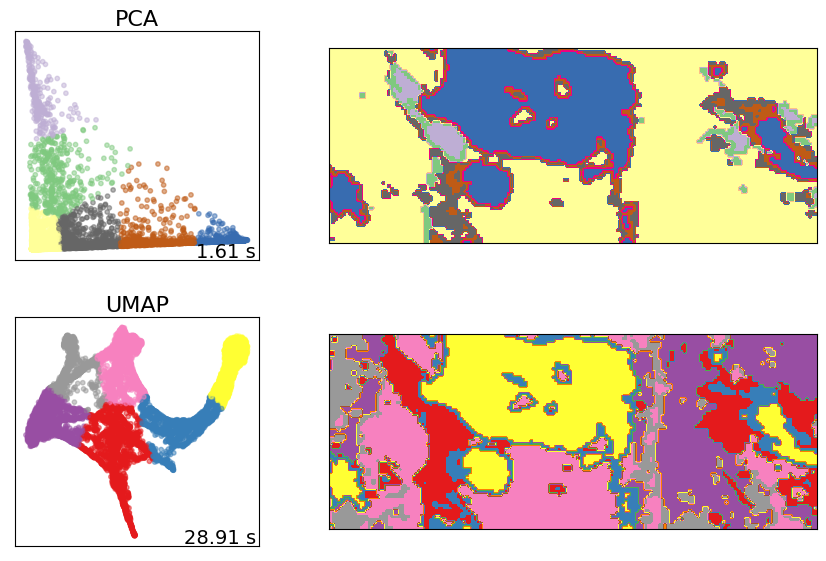

Processing complete


In [2]:
args_in = ["-f", "data/example_datafile.GeoPIXE", "-a", "-c",] 

pixelseries, xfmap, rgbarray, categories, classavg = main.main(args_in)

In [3]:
pixelseries.data[0].shape

(12250, 4096)

In [21]:
import numpy as np
import scipy as sp



In [23]:
correction.shape

(2, 20)

In [301]:
#fit spline through multiplier

correction = np.loadtxt("data/counts_per_ppm_mod.csv", delimiter=",")

lines = np.loadtxt("data/linepos.csv", delimiter=",")

energy=xfmap.energy

MULT=1/correction

spline = sp.interpolate.UnivariateSpline(lines, MULT, k=1)

CORRECTION_FACTORS = spline(energy)


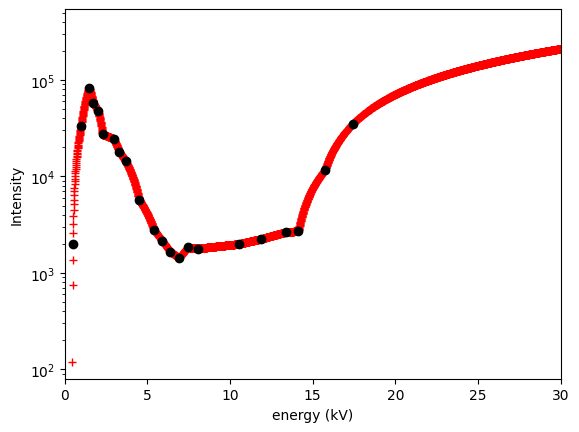

In [302]:
#plot spline

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots() 

ax1.set_xlabel('energy (kV)') 
ax1.set_ylabel('Intensity') 
ax1.axis(xmin=0,xmax=30)

ax1.set_yscale('log')
#ax1.axis(ymin=0.00005,ymax=1)

ax1.plot(energy, CORRECTION_FACTORS, "r+" )

ax1.plot(lines, MULT, "ko")

plt.show()


In [213]:
print(lines)
print(correction)
print(MULT)

[ 0.5    1.     1.486  1.739  2.013  2.304  2.957  3.312  3.69   4.508
  5.411  5.894  6.398  6.924  7.471  8.04  10.53  11.907 13.373 14.14
 15.744 17.441]
[7.00000e-06 3.00000e-07 6.53989e-07 3.07225e-06 6.07492e-06 8.86851e-06
 3.05230e-05 5.59011e-05 6.93785e-05 1.75159e-04 3.61108e-04 4.65544e-04
 6.04780e-04 6.97253e-04 5.42119e-04 5.58549e-04 5.01282e-04 4.43092e-04
 3.77418e-04 3.68455e-04 8.58165e-05 2.83151e-05]
[1.42857143e+05 3.33333333e+06 1.52907771e+06 3.25494345e+05
 1.64611221e+05 1.12758513e+05 3.27621793e+04 1.78887356e+04
 1.44136872e+04 5.70909859e+03 2.76925463e+03 2.14802468e+03
 1.65349383e+03 1.43419964e+03 1.84461345e+03 1.79035322e+03
 1.99488511e+03 2.25686765e+03 2.64958216e+03 2.71403564e+03
 1.16527707e+04 3.53168451e+04]


1538461.5384615385

In [405]:
#function to fit baseline and adjust by multiplier

import pybaselines

def estconc(spectrum, cut):
    spectrum=spectrum[cut:]

    bg = pybaselines.smooth.snip(spectrum, 30, decreasing=True, smooth_half_window=1)[0]

    sub = spectrum-bg

    #strip out all values <1 - not sure if this helps
    sub[sub < 1] = 0

    adj=sub*CORRECTION_FACTORS[cut:]

    fig, ax1 = plt.subplots() 

    ax1.set_xlabel('energy (kV)') 
    ax1.set_ylabel('Intensity') 
    ax1.axis(xmin=0,xmax=30)

    ax1.set_yscale('log')
    ax1.axis(ymin=0.8,ymax=10000000)

    ax1.plot(energy[cut:], spectrum, color="grey")
    ax1.plot(energy[cut:], bg, color="red")
    ax1.plot(energy[cut:], sub, color="blue")
    ax1.plot(energy[cut:], adj, color="green")
    

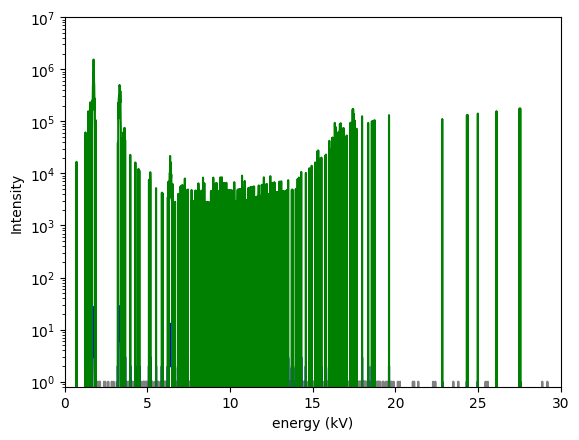

In [406]:
#do it
#estconc(classavg[1,4],50)
estconc(pixelseries.data[0,10000],50)